Import needed libraries.

In [57]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import gregw
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Bring in train and test data.

In [52]:
train = pd.read_csv("house_prices_train.csv")
test = pd.read_csv("housing_prices_test.csv")

Look for duplicated data.

In [53]:
print "Number in train that are duplicated:", len(train[train.duplicated() == True])
print "Number in test that are duplicated:", len(test[test.duplicated() == True])

Number in train that are duplicated: 0
Number in test that are duplicated: 0


Have a look at the sale prices of the homes.

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


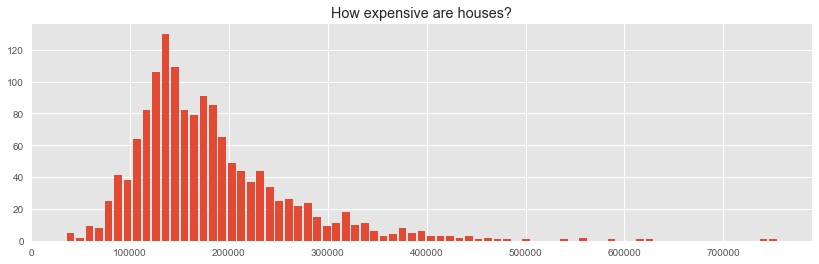

In [58]:
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

Look at how old the homes are.

Oldest house built in 1872. Newest house built in 2010.


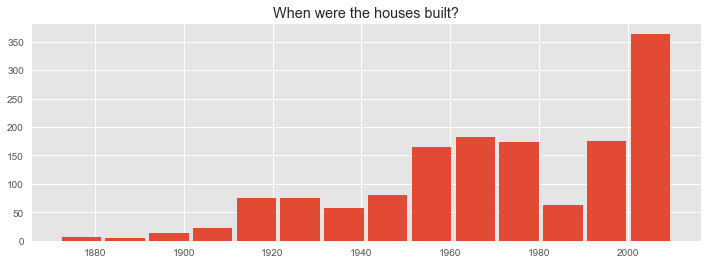

In [59]:
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

Look at the seasonality of the transactions.

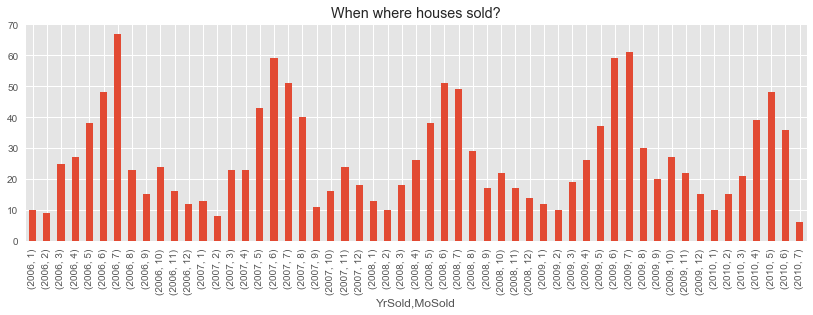

In [61]:
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.show()

Cut out the sale price of the train data.

In [47]:
y = train['SalePrice']
train.drop(['SalePrice'], axis = 1, inplace = True)

Copy and cut out ID of train data.

In [ ]:
test_id = test['Id']
alldata = pd.concat([train, test], axis=0)
alldata.drop(['Id'], axis = 1, inplace = True)

Find columns with missing data.

In [21]:
list(alldata.columns[alldata.isnull().any()])

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

Change the dtype of some of the columns.

In [22]:
alldata['MSSubClass'] = alldata['MSSubClass'].astype(object)
alldata['MoSold'] = alldata['MoSold'].astype(object)
alldata['YrSold'] = alldata['YrSold'].astype(object)
alldata['BsmtFullBath'] = alldata['BsmtFullBath'].astype(object)
alldata['BsmtHalfBath'] = alldata['BsmtHalfBath'].astype(object)

Fill in simple missing values.

In [23]:
alldata.LotFrontage = alldata.LotFrontage.fillna(0)
alldata['GarageCars'] = alldata['GarageCars'].fillna(0)
alldata['GarageArea'] = alldata['GarageArea'].fillna(519)
alldata.Alley = alldata.Alley.fillna('None')
alldata.FireplaceQu = alldata.FireplaceQu.fillna('None')
alldata.GarageType = alldata.GarageType.fillna('None')
alldata['GarageYrBlt'] = alldata['GarageYrBlt'].fillna('None')
alldata['GarageFinish'] = alldata['GarageFinish'].fillna('None')
alldata['GarageQual'] = alldata['GarageQual'].fillna('None')
alldata['GarageCond'] = alldata['GarageCond'].fillna('None')
alldata['PoolQC'] = alldata['PoolQC'].fillna('None')
alldata['Fence'] = alldata['Fence'].fillna('None')
alldata['MiscFeature'] = alldata['MiscFeature'].fillna('None')

Impute values for missing values.

In [24]:
gregw.impute_cal('MSZoning', alldata)
gregw.impute_cal('Utilities', alldata)
gregw.impute_cal('Exterior1st', alldata)
gregw.impute_cal('Exterior2nd', alldata)
gregw.impute_cal('MasVnrType', alldata)
gregw.impute_reg('MasVnrArea', alldata)
gregw.impute_cal('BsmtQual', alldata)
gregw.impute_cal('BsmtCond', alldata)
gregw.impute_cal('BsmtExposure', alldata)
gregw.impute_cal('BsmtFinType1', alldata)
gregw.impute_reg('BsmtFinSF1', alldata)
gregw.impute_reg('BsmtFinSF2', alldata)
gregw.impute_reg('BsmtUnfSF', alldata)
gregw.impute_reg('TotalBsmtSF', alldata)
gregw.impute_cal('BsmtFinType2', alldata)
gregw.impute_cal('Electrical', alldata)
gregw.impute_cal('BsmtFullBath', alldata)
gregw.impute_cal('BsmtHalfBath', alldata)
gregw.impute_cal('KitchenQual', alldata)
gregw.impute_cal('Functional', alldata)
gregw.impute_reg('GarageCars', alldata)
gregw.impute_cal('SaleType', alldata)

gregw.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pred.drop(col1, axis = 1, inplace = True)
gregw.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  train.drop(col1, axis = 1, inplace = True)
gregw.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  train.drop(col1, axis = 1, inplace = True) # remove y from train set
gregw.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.py

No Missing / NaN Data or no missing value designated.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
7,60,RL,0.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,1,2008,WD,Normal


Check for anything I may of missed.

In [29]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 78 columns):
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 n

Create dummy values.

In [31]:
#alldata.drop(['MiscVal'], axis = 1, inplace = True)
dummies_data = pd.get_dummies(alldata,drop_first=True)

Split data back into the orginal train and test data.

In [32]:
train = dummies_data.iloc[:1460]
test = dummies_data.iloc[1460:]

Create a baseline using the default paramters of XGBoost.

In [35]:
cross_val_score(XGBRegressor(), train, y, cv = 3).mean()

0.88330101934186844

Create dictionary of paramaters to be tuned and cross validated.

In [18]:
parameters = {'base_score':[.55], 'max_depth': [1,2], 'n_estimators':[1008],
              'min_child_weight' :[1], 'colsample_bytree' :[.8],
              'colsample_bylevel':[0.79, .8, .81]}

Now I will use a three fold cross validation to find the best parameters.

In [41]:
XGBR = GridSearchCV(XGBRegressor(), parameters, n_jobs=-1, cv=3, verbose=1)
XGBR.fit(train, y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'colsample_bytree': [0.8], 'colsample_bylevel': [0.79, 0.8, 0.81], 'base_score': [0.55], 'n_estimators': [1008], 'min_child_weight': [1], 'max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

Tuning achieved a 1.9% improvement over the baseline.

In [42]:
print 'Best score for data:', XGBR.best_score_
XGBR.best_estimator_ 

Best score for data: 0.901073673504


XGBRegressor(base_score=0.55, colsample_bylevel=0.81, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=1008, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

Now that I have found out what the best paramaters are I will use them to make my predictions.

In [26]:
tuned_final = XGBRegressor(base_score=0.55, colsample_bylevel=0.79, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=1008, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1).fit(train, y)
answer = pd.DataFrame()
answer['SalePrice'] = tuned_final.predict(test)

Then I will add in the orginal IDs and save the CSV.

In [27]:
final = pd.concat([test_id, answer['SalePrice']], axis=1)
final.to_csv('kaggle_house_prices.csv', index=False)